In [1]:
import sys
sys.path.append('/home/fenglab/Desktop/transdiff_GRN/src/')

from find_modules import *
from topology import *

In [2]:
random_s = 11
random.seed(random_s)

In [3]:
# with open('./../data/count_matrix.csv', 'r') as f:
#     lines = f.readlines()
# entrez_ids = {line.split(',')[0]:line.split(',')[2] for line in lines[1:]}

with open('./../../data/GSE208199/QuickGO-annotations-TFs-mus.tsv', 'r') as f:
    lines = f.readlines()
tfs = [line.split('\t')[2] for line in lines[1:]]

with open('./../../data/GSE208199/grn_expression_t3.txt', 'r') as f:
    lines = f.readlines()
genes = [line.split('\t')[0] for line in lines[1:]]

grntfs = list(set(tfs)&set(genes))

In [4]:
dfexp = pd.read_csv('./../../data/GSE208199/matrix.csv').set_index('geneid')
dfexp = np.log2(dfexp+1)
dfexp = dfexp.loc[~dfexp.index.duplicated(keep='first'), :]
dfexp = dfexp[['Ascl1_ESC_1', 'Ascl1_ESC_2', 'Ascl1_D2_1', 'Ascl1_D2_2',
    'Ascl1_D3_GFPpos_1', 'Ascl1_D3_GFPpos_2','Ascl1_D4_GFPpos_1', 'Ascl1_D4_GFPpos_2',
    'Ascl1_D6_GFPpos_1','Ascl1_D6_GFPpos_2',
    'Ascl1_ESC_1', 'Ascl1_ESC_2', 'Ascl1_D2_1', 'Ascl1_D2_2',
    'Ascl1_D3_GFPneg_1','Ascl1_D3_GFPneg_2','Ascl1_D4_GFPneg_1', 'Ascl1_D4_GFPneg_2',
    'Ascl1_D6_GFPneg_1', 'Ascl1_D6_GFPneg_2',
    'Ngn2_ESC_1', 'Ngn2_ESC_2', 'Ngn2_D2_combi_1', 'Ngn2_D2_combi_2',
    'Ngn2_D3_GFPpos_1', 'Ngn2_D3_GFPpos_2','Ngn2_D4_GFPpos_1', 'Ngn2_D4_GFPpos_2',
    'Ngn2_D6_GFPpos_2', 'Ngn2_D6_GFPneg_1',
    'Ngn2_ESC_1', 'Ngn2_ESC_2', 'Ngn2_D2_combi_1', 'Ngn2_D2_combi_2',
    'Ngn2_D3_GFPneg_1','Ngn2_D3_GFPneg_2', 'Ngn2_D4_GFPneg_1', 'Ngn2_D4_GFPneg_2',
    'Ngn2_D6_GFPneg_1', 'Ngn2_D6_GFPneg_2']]

In [50]:
treatments = ['Ascl1p', 'Ascl1n', 'Ngn2p', 'Ngn2n']

def go_plot(community_no):
    '''gene ontology bar plot for one community'''
    dfannots = pd.read_csv(f'./../../results/temp/{str(community_no)}.csv')
    if len(dfannots.T)>1:
        dfannots['refgs'] = [int(n.split('/')[0]) for n in dfannots['BgRatio']]
        dfannots = dfannots[(dfannots['refgs']<1500)&(dfannots['refgs']>10)]
        dfannots = dfannots.drop_duplicates(subset='geneID', keep='first')
        dfannots = dfannots[:10]
        dfannots = dfannots.sort_values(by=['p.adjust'], ascending=False)
        if len(dfannots)>=1:
            if len(dfannots)>1:
                fig = plt.figure(figsize=(1.3, 1.5*np.log(len(dfannots))))
            else:
                fig = plt.figure(figsize=(1.3, 0.4))
            ax = fig.add_subplot(1, 1, 1)
            
            # abbreviations
            ylabels = [yl.replace('projection', 'proj.') for yl in list(dfannots['Description'])]
            ylabels = [yl.replace('regulation', 'reg.') for yl in ylabels]
            ylabels = [yl.replace('differentiation', 'differ.') for yl in ylabels]
            ylabels = [yl.replace('organization', 'org.') for yl in ylabels]
            ylabels = [yl.replace('morphogenesis', 'morpho.') for yl in ylabels]
            
            plt.barh(ylabels, -np.log10(dfannots['p.adjust']), 
                    color=colors[community_no], alpha=0.2, edgecolor=colors[community_no], linewidth=2)
            plt.barh(ylabels, -np.log10(dfannots['p.adjust']), 
                    color='none', alpha=0.7, edgecolor=colors[community_no], linewidth=2)
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
            plt.title(str(community_no), fontsize=15)
            plt.xlabel('-log'+r'$_{10}$'+'(FDR)', fontsize=15)
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
    return

def go_group_plot(community_no):
    '''gene ontology bar plot for all communities, input as list'''
    fig = plt.figure(figsize=(1.3, 4.5))
    ax = fig.add_subplot(1, 1, 1)
    bary=0
    ylab=[]
    for n in community_no:
        df = pd.read_csv(f'./../../results/temp/{str(n)}.csv')
        if len(df.T)>1:
            df['refgs'] = [int(n.split('/')[0]) for n in df['BgRatio']]
            df = df[(df['refgs']<1500)&(df['refgs']>10)]
            df = df.drop_duplicates(subset='geneID', keep='first')
            df = df[:3]
            df = df.sort_values(by=['p.adjust'], ascending=True)
            
            # abbreviations
            ylabels = [yl.replace('projection', 'proj.') for yl in list(df['Description'])]
            ylabels = [yl.replace('regulation', 'reg.') for yl in ylabels]
            ylabels = [yl.replace('differentiation', 'differ.') for yl in ylabels]
            ylabels = [yl.replace('organization', 'org.') for yl in ylabels]
            ylabels = [yl.replace('morphogenesis', 'morpho.') for yl in ylabels]
            
            plt.barh(np.arange(bary,bary+len(ylabels)), -np.log10(df['p.adjust']), 
                    color=colors[n], alpha=0.2, edgecolor=colors[n], linewidth=2)
            plt.barh(np.arange(bary,bary+len(ylabels)), -np.log10(df['p.adjust']), 
                    color='none', alpha=0.7, edgecolor=colors[n], linewidth=2)
            bary += len(ylabels)
            ylab += ylabels
            
    plt.gca().invert_yaxis()
    plt.xticks(fontsize=15)
    plt.yticks(np.arange(bary),ylab,fontsize=15)
    plt.xlabel('-log'+r'$_{10}$'+'(FDR)', fontsize=15)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    return

In [33]:
DG = read_directed_grn(f'./../../results/GSE208199/GRN/{treatments[0]}_1_t3.txt')
DGp = remove_edge(DG, 0.39, component='positive')
print(f'edges {len(DGp.edges())}')
print(f'nodes {len(DGp.nodes())}')
print(f'''mean weight {np.sum([w for _, _, w in list(DGp.edges.data('weight'))])/len(DGp.edges())}''')
print(f'mean degree {np.sum(list(dict(DGp.degree()).values()))/len(DGp.nodes())}')

edges 1765
nodes 344
mean weight 0.4715925243290013
mean degree 10.261627906976743


Text(0, 0.5, 'P(Degree)')

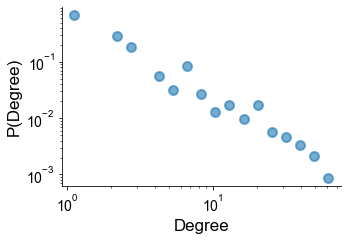

In [6]:
x1, y1 = plot_degree(DGp, n_bins=20)
fig = plt.figure(figsize=(5,3.3))
ax = fig.add_subplot(1, 1, 1)
ax.loglog(x1,y1, 'o', markersize=9, markeredgecolor='tab:blue', markeredgewidth=2, alpha=0.6)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Degree', fontsize=17)
plt.ylabel('P(Degree)', fontsize=17)
# plt.savefig('./../figs/S5A.svg', pad_inches=0.1, bbox_inches='tight')

In [34]:
part = louvain_cluster(DGp, random_state=True, random_s=random_s)
clustergo(part, lib='org.Mm.eg.db')

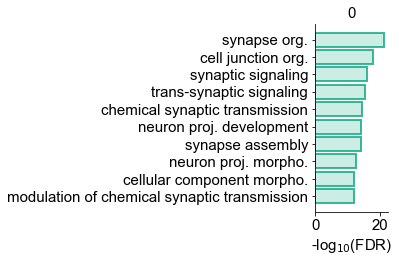

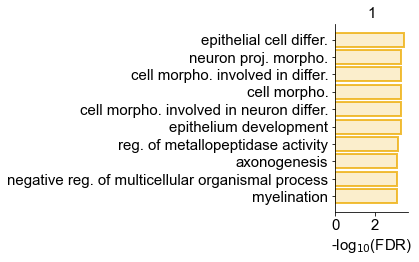

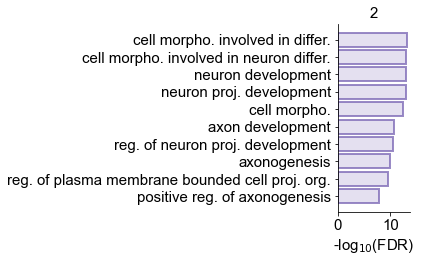

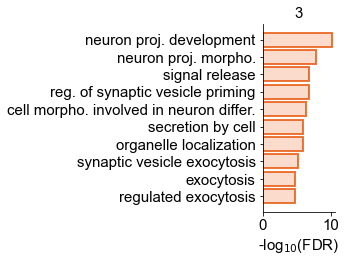

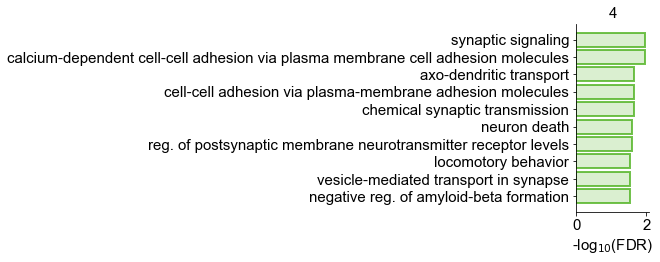

In [40]:
for n in np.unique(list(part.values())):
    go_plot(n)
#     plt.savefig(f'./../../figs/8B_{n}.svg', pad_inches=0.1, bbox_inches='tight')

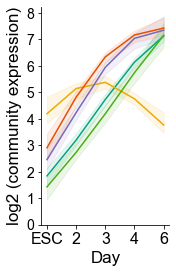

In [53]:
dfmem = pd.DataFrame(part, index=['Community']).T
fig = plt.figure(figsize=((2.3,4)))
ax = fig.add_subplot(1,1,1)
cmap = get_cmap(part, highlight=True, modulelist=list(np.arange(5)), alpha=0.8)
eval_x = np.arange(1.0,6.0)

for n in list(np.arange(5)):
    xs = np.repeat(np.array([np.repeat(np.arange(1.0,6.0),2)]),len(dfmem[dfmem['Community']==n]),axis=0)
    ys = dfexp.loc[dfmem[dfmem['Community']==n].index].to_numpy()[:,:10]
    smoothed, bottom, top = lowess_with_confidence_bounds(
        xs.flatten(), ys.flatten(), eval_x, lowess_kw={"frac": 0.8, "return_sorted":False})

    plt.plot(eval_x,smoothed, color=cmap[n])
    plt.fill_between(eval_x, bottom, top, color=cmap[n], alpha=0.1)

plt.ylim(bottom=0)
plt.xlabel('Day', fontsize=17)
plt.ylabel('log2 (community expression)', fontsize=17)
plt.xticks([1,2,3,4,5], ['ESC','2','3','4','6'], fontsize=16)
plt.yticks(fontsize=14)
# plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('./../../figs/8B_exp.svg', pad_inches=0.1, bbox_inches='tight')

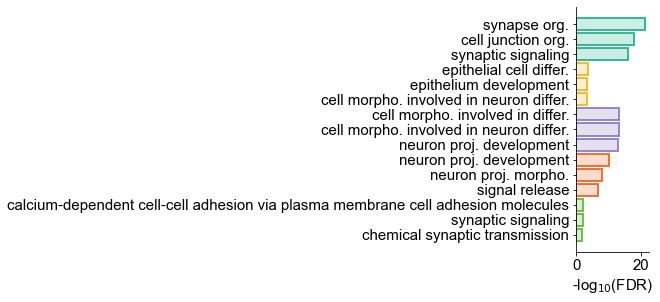

In [54]:
go_group_plot(list(np.arange(5)))
# plt.savefig('./../../figs/8B_exp_go.svg', pad_inches=0.1, bbox_inches='tight')

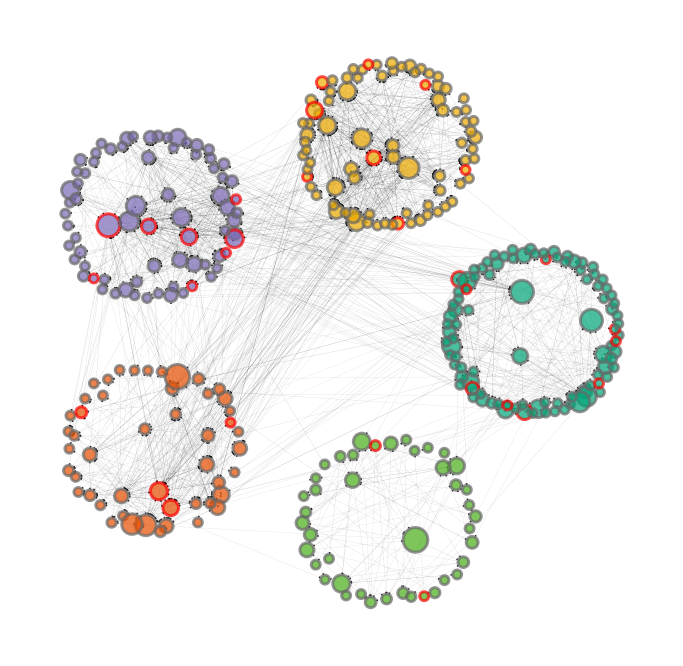

In [14]:
pos = community_layout(DGp, partition=part, scales_c=2.4, scales_n=1.8)
fig, ax = plt.subplots(figsize=(12, 12))
edge_colors = highlight_cmap(list(DGp.nodes()),grntfs)

node_size = np.array(list(nx.betweenness_centrality(DGp, weight='weight', seed=random_s).values()))*8000+80
edge_width = np.array(list(nx.get_edge_attributes(DGp, 'weight').values()))
#cmap = get_cmap(part, highlight=False)
cmap = get_cmap(part, highlight=True, modulelist=[0,1,2,3,4], alpha=0.8)
node_color=[cmap[v] for v in list(part.values())]

nodes = nx.draw_networkx_nodes(DGp, pos, node_color=node_color, edgecolors=edge_colors,
                               node_size=node_size, alpha=0.7, linewidths=3)
edges = nx.draw_networkx_edges(DGp, pos, node_size=node_size,
                               width=0.1*edge_width, edge_color='black', arrowsize=5)

ax.set_axis_off()
# plt.savefig('./../../figs/8B.svg', pad_inches=0.1, bbox_inches='tight')

In [12]:
dffig = pd.DataFrame(zip(list(DGp.nodes()), node_size, edge_colors, list(part.values())), 
columns=['geneid', 'rank', 'istf', 'community'])
dffig[dffig['istf']=='#fc0303'].sort_values(by=['rank'], ascending=False)[:10]

,geneid,rank,istf,community
0,Shox2,521.852932,#fc0303,2
20,Phox2a,309.417080,#fc0303,2
21,Isl1,296.459516,#fc0303,3
62,Six3,251.858217,#fc0303,1
24,Tfap2b,241.014782,#fc0303,3
11,Tlx3,239.787223,#fc0303,2
204,Dlx1,232.285476,#fc0303,0
86,Lmx1a,230.239544,#fc0303,0
14,Pou6f2,205.074591,#fc0303,2
7,Kcnip3,185.842838,#fc0303,1


In [31]:
dffig[dffig['istf']!='#fc0303'].sort_values(by=['rank'], ascending=False)[:3]

,geneid,rank,istf,community
131,Scn3b,609.486983,#696969,4
66,Hecw1,602.871805,#696969,3
77,Maoa,528.740900,#696969,0


In [55]:
DG = read_directed_grn(f'./../../results/GSE208199/GRN/{treatments[1]}_1_t3.txt')
DGp = remove_edge(DG, 0.48, component='positive')
print(f'edges {len(DGp.edges())}')
print(f'nodes {len(DGp.nodes())}')
print(f'''mean weight {np.sum([w for _, _, w in list(DGp.edges.data('weight'))])/len(DGp.edges())}''')
print(f'mean degree {np.sum(list(dict(DGp.degree()).values()))/len(DGp.nodes())}')

edges 1219
nodes 285
mean weight 0.5615919620294526
mean degree 8.554385964912282


Text(0, 0.5, 'P(Degree)')

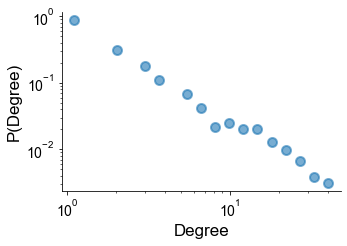

In [16]:
x1, y1 = plot_degree(DGp, n_bins=20)
fig = plt.figure(figsize=(5,3.3))
ax = fig.add_subplot(1, 1, 1)
ax.loglog(x1,y1, 'o', markersize=9, markeredgecolor='tab:blue', markeredgewidth=2, alpha=0.6)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Degree', fontsize=17)
plt.ylabel('P(Degree)', fontsize=17)
# plt.savefig('./../figs/S5B.svg', pad_inches=0.1, bbox_inches='tight')

In [56]:
part = louvain_cluster(DGp, random_state=True, random_s=random_s)
clustergo(part, lib='org.Mm.eg.db')

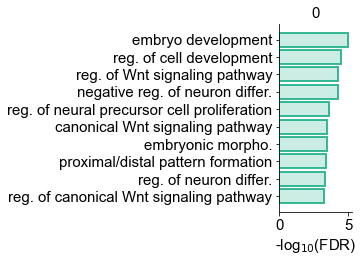

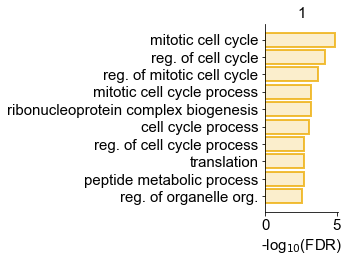

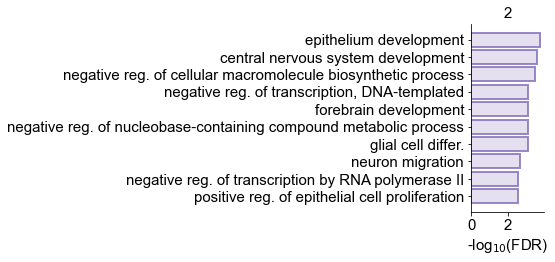

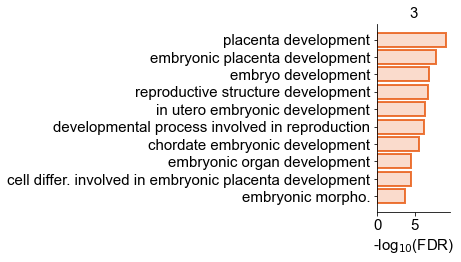

In [18]:
for n in np.unique(list(part.values())):
    go_plot(n)
#     plt.savefig(f'./../../figs/8C_{n}.svg', pad_inches=0.1, bbox_inches='tight')

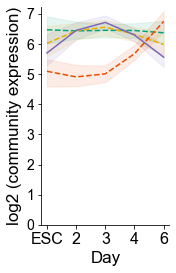

In [26]:
dfmem = pd.DataFrame(part, index=['Community']).T
fig = plt.figure(figsize=((2.3,4)))
ax = fig.add_subplot(1,1,1)
cmap = get_cmap(part, highlight=True, modulelist=list(np.arange(4)), alpha=0.8)
eval_x = np.arange(1.0,6.0)

for n in list(np.arange(4)):
    xs = np.repeat(np.array([np.repeat(np.arange(1.0,6.0),2)]),len(dfmem[dfmem['Community']==n]),axis=0)
    ys = dfexp.loc[dfmem[dfmem['Community']==n].index].to_numpy()[:,10:20]
    smoothed, bottom, top = lowess_with_confidence_bounds(
        xs.flatten(), ys.flatten(), eval_x, lowess_kw={"frac": 0.8, "return_sorted":False})
    if n == 2:
        plt.plot(eval_x,smoothed, color=cmap[n])
    else:
        plt.plot(eval_x,smoothed, color=cmap[n], ls='--')
    plt.fill_between(eval_x, bottom, top, color=cmap[n], alpha=0.1)

plt.ylim(bottom=0)
plt.xlabel('Day', fontsize=17)
plt.ylabel('log2 (community expression)', fontsize=17)
plt.xticks([1,2,3,4,5], ['ESC','2','3','4','6'], fontsize=16)
plt.yticks(fontsize=14)
# plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('./../../figs/8C_exp.svg', pad_inches=0.1, bbox_inches='tight')

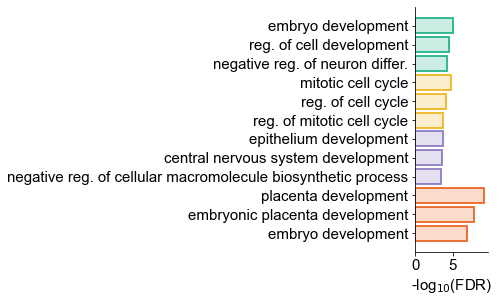

In [58]:
go_group_plot(list(np.arange(4)))
# plt.savefig('./../../figs/8C_exp_go.svg', pad_inches=0.1, bbox_inches='tight')

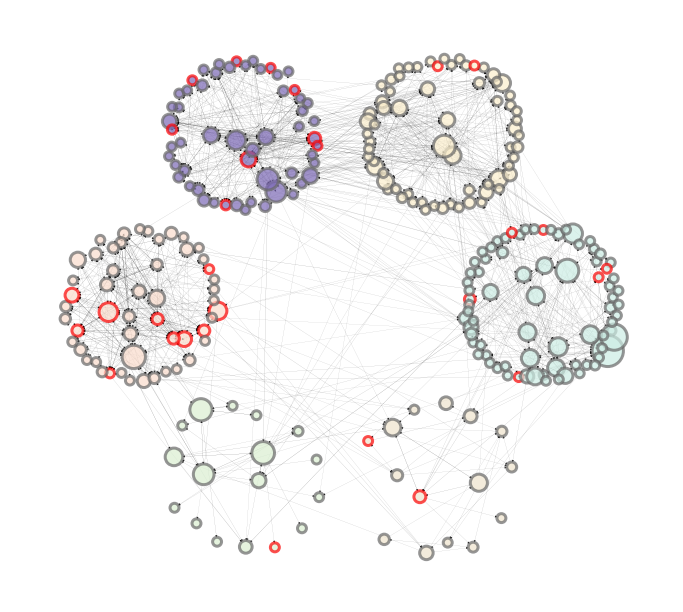

In [23]:
pos = community_layout(DGp, partition=part, scales_c=2.6, scales_n=1.8)
fig, ax = plt.subplots(figsize=(12, 11))
edge_colors = highlight_cmap(list(DGp.nodes()),grntfs)

node_size = np.array(list(nx.betweenness_centrality(DGp, weight='weight', seed=random_s).values()))*8000+80
edge_width = np.array(list(nx.get_edge_attributes(DGp, 'weight').values()))
#cmap = get_cmap(part, highlight=False)
cmap = get_cmap(part, highlight=True, modulelist=[2], alpha=0.8)
node_color=[cmap[v] for v in list(part.values())]

nodes = nx.draw_networkx_nodes(DGp, pos, node_color=node_color, edgecolors=edge_colors,
                               node_size=node_size, alpha=0.7, linewidths=3)
edges = nx.draw_networkx_edges(DGp, pos, node_size=node_size,
                               width=0.1*edge_width, edge_color='black', arrowsize=5)

ax.set_axis_off()
# plt.savefig('./../../figs/8C.svg', pad_inches=0.1, bbox_inches='tight')

In [20]:
dffig = pd.DataFrame(zip(list(DGp.nodes()), node_size, edge_colors, list(part.values())), 
columns=['geneid', 'rank', 'istf', 'community'])
dffig[dffig['istf']=='#fc0303'].sort_values(by=['rank'], ascending=False)[:12]

,geneid,rank,istf,community
53,Elf3,349.745683,#fc0303,3
50,Hand1,311.921565,#fc0303,3
0,Zic5,220.048773,#fc0303,2
4,Rhox9,215.071916,#fc0303,3
52,Tfap2c,191.481611,#fc0303,3
71,Sox1,154.354253,#fc0303,2
75,Tcf15,141.912109,#fc0303,5
30,Esx1,128.872742,#fc0303,3
39,Cebpa,128.375056,#fc0303,3
45,Rhox5,125.886627,#fc0303,3


In [22]:
dffig[dffig['istf']!='#fc0303'].sort_values(by=['rank'], ascending=False)[:3]

,geneid,rank,istf,community
36,Cited4,979.716319,#696969,0
78,Nbl1,688.570149,#696969,0
21,Prlr,543.942667,#696969,3


In [59]:
DG = read_directed_grn(f'./../../results/GSE208199/GRN/{treatments[2]}_1_t3.txt')
DGp = remove_edge(DG, 0.44, component='positive')
print(f'edges {len(DGp.edges())}')
print(f'nodes {len(DGp.nodes())}')
print(f'''mean weight {np.sum([w for _, _, w in list(DGp.edges.data('weight'))])/len(DGp.edges())}''')
print(f'mean degree {np.sum(list(dict(DGp.degree()).values()))/len(DGp.nodes())}')

edges 1558
nodes 316
mean weight 0.5223091119927052
mean degree 9.860759493670885


Text(0, 0.5, 'P(Degree)')

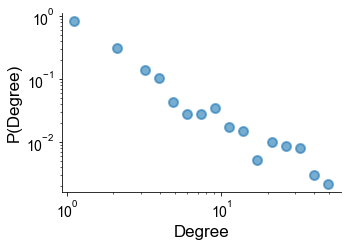

In [52]:
x1, y1 = plot_degree(DGp, n_bins=20)
fig = plt.figure(figsize=(5,3.3))
ax = fig.add_subplot(1, 1, 1)
ax.loglog(x1,y1, 'o', markersize=9, markeredgecolor='tab:blue', markeredgewidth=2, alpha=0.6)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Degree', fontsize=17)
plt.ylabel('P(Degree)', fontsize=17)
# plt.savefig('./../figs/S5C.svg', pad_inches=0.1, bbox_inches='tight')

In [60]:
part = louvain_cluster(DGp, random_state=True, random_s=random_s)
clustergo(part, lib='org.Mm.eg.db')

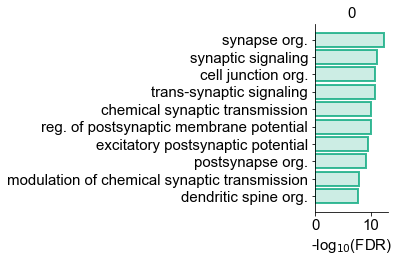

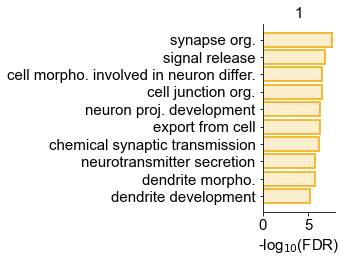

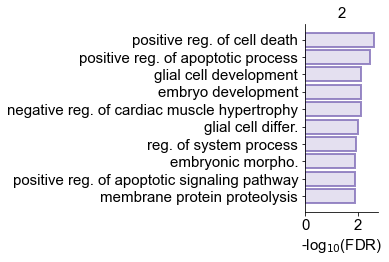

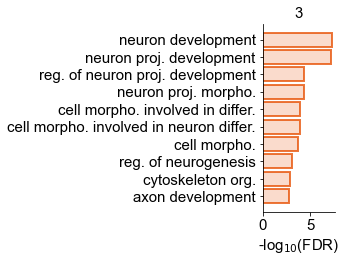

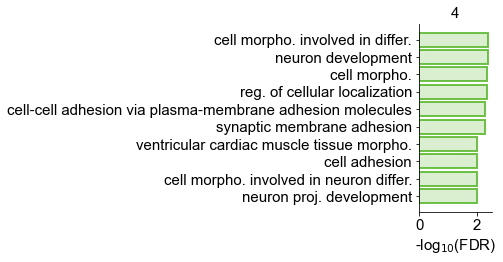

In [26]:
for n in np.unique(list(part.values())):
    go_plot(n)
#     plt.savefig(f'./../../figs/8D_{n}.svg', pad_inches=0.1, bbox_inches='tight')

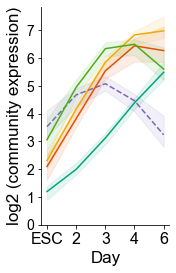

In [30]:
dfmem = pd.DataFrame(part, index=['Community']).T
fig = plt.figure(figsize=((2.3,4)))
ax = fig.add_subplot(1,1,1)
cmap = get_cmap(part, highlight=True, modulelist=list(np.arange(5)), alpha=0.8)
eval_x = np.arange(1.0,6.0)

for n in list(np.arange(5)):
    xs = np.repeat(np.array([np.repeat(np.arange(1.0,6.0),2)]),len(dfmem[dfmem['Community']==n]),axis=0)
    ys = dfexp.loc[dfmem[dfmem['Community']==n].index].to_numpy()[:,20:30]
    smoothed, bottom, top = lowess_with_confidence_bounds(
        xs.flatten(), ys.flatten(), eval_x, lowess_kw={"frac": 0.8, "return_sorted":False})
    if n == 2:
        plt.plot(eval_x,smoothed, color=cmap[n], ls='--')
    else:
        plt.plot(eval_x,smoothed, color=cmap[n])
    plt.fill_between(eval_x, bottom, top, color=cmap[n], alpha=0.1)

plt.ylim(bottom=0)
plt.xlabel('Day', fontsize=17)
plt.ylabel('log2 (community expression)', fontsize=17)
plt.xticks([1,2,3,4,5], ['ESC','2','3','4','6'], fontsize=16)
plt.yticks(fontsize=14)
# plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('./../../figs/8D_exp.svg', pad_inches=0.1, bbox_inches='tight')

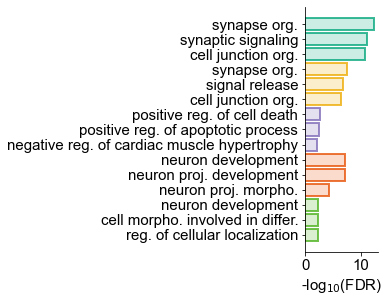

In [62]:
go_group_plot(list(np.arange(5)))
# plt.savefig('./../../figs/8D_exp_go.svg', pad_inches=0.1, bbox_inches='tight')

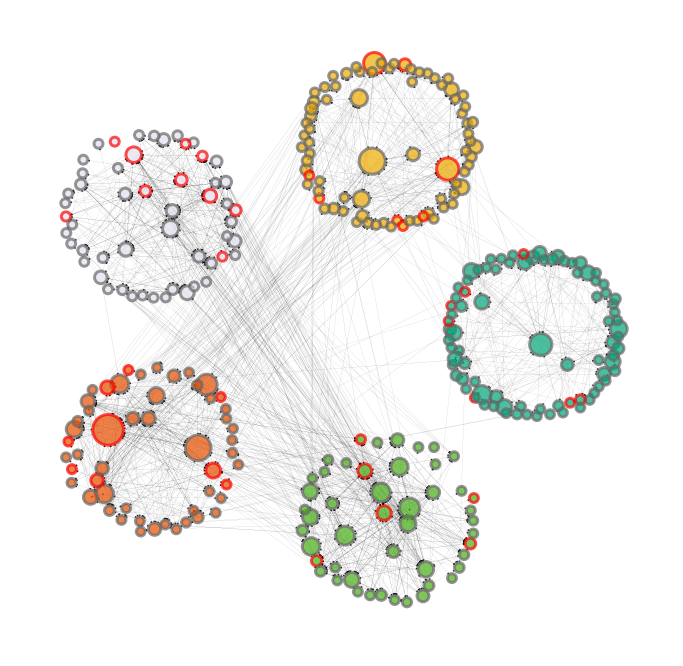

In [29]:
part = louvain_cluster(DGp, random_state=True, random_s=random_s)
pos = community_layout(DGp, partition=part, scales_c=2.4, scales_n=1.8)
fig, ax = plt.subplots(figsize=(12, 12))
edge_colors = highlight_cmap(list(DGp.nodes()),grntfs)

node_size = np.array(list(nx.betweenness_centrality(DGp, weight='weight', seed=random_s).values()))*8000+80
edge_width = np.array(list(nx.get_edge_attributes(DGp, 'weight').values()))
#cmap = get_cmap(part, highlight=False)
cmap = get_cmap(part, highlight=True, modulelist=[0,1,3,4], alpha=0.8)
node_color=[cmap[v] for v in list(part.values())]

nodes = nx.draw_networkx_nodes(DGp, pos, node_color=node_color, edgecolors=edge_colors,
                               node_size=node_size, alpha=0.7, linewidths=3)
edges = nx.draw_networkx_edges(DGp, pos, node_size=node_size,
                               width=0.1*edge_width, edge_color='black', arrowsize=5)

ax.set_axis_off()
# plt.savefig('./../../figs/8D.svg', pad_inches=0.1, bbox_inches='tight')

In [30]:
dffig = pd.DataFrame(zip(list(DGp.nodes()), node_size, edge_colors, list(part.values())), 
columns=['geneid', 'rank', 'istf', 'community'])
dffig[dffig['istf']=='#fc0303'].sort_values(by=['rank'], ascending=False)[:10]

,geneid,rank,istf,community
24,Lhx9,940.661207,#fc0303,3
72,Otp,496.782934,#fc0303,1
62,Lhx4,467.503791,#fc0303,1
53,Olig2,242.652917,#fc0303,2
31,Esrrg,219.682540,#fc0303,3
23,Etv1,210.785563,#fc0303,4
87,Bhlhe23,189.028410,#fc0303,4
36,Aff3,180.535841,#fc0303,3
1,Olig1,170.910929,#fc0303,2
57,Pou4f1,156.918411,#fc0303,3


In [57]:
dffig[dffig['istf']!='#fc0303'].sort_values(by=['rank'], ascending=False)[:3]

,geneid,rank,istf,community
33,C1ql3,682.810636,#696969,1
9,Syt2,661.862299,#696969,3
113,Hs3st4,495.488828,#696969,0


In [63]:
DG = read_directed_grn(f'./../../results/GSE208199/GRN/{treatments[3]}_2_t3.txt')
DGp = remove_edge(DG, 0.447, component='positive')
print(f'edges {len(DGp.edges())}')
print(f'nodes {len(DGp.nodes())}')
print(f'''mean weight {np.sum([w for _, _, w in list(DGp.edges.data('weight'))])/len(DGp.edges())}''')
print(f'mean degree {np.sum(list(dict(DGp.degree()).values()))/len(DGp.nodes())}')

edges 1181
nodes 281
mean weight 0.5247626090363888
mean degree 8.405693950177936


Text(0, 0.5, 'P(Degree)')

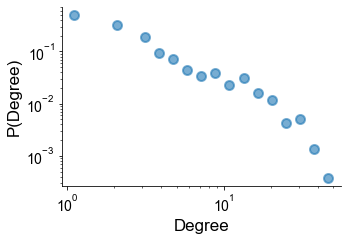

In [6]:
x1, y1 = plot_degree(DGp, n_bins=20)
fig = plt.figure(figsize=(5,3.3))
ax = fig.add_subplot(1, 1, 1)
ax.loglog(x1,y1, 'o', markersize=9, markeredgecolor='tab:blue', markeredgewidth=2, alpha=0.6)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Degree', fontsize=17)
plt.ylabel('P(Degree)', fontsize=17)
# plt.savefig('./../figs/S5D.svg', pad_inches=0.1, bbox_inches='tight')

In [64]:
part = louvain_cluster(DGp, random_state=True, random_s=random_s)
clustergo(part, lib='org.Mm.eg.db')

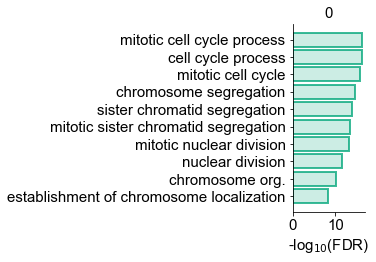

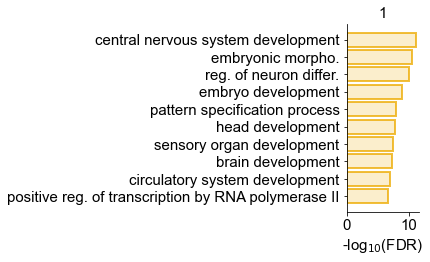

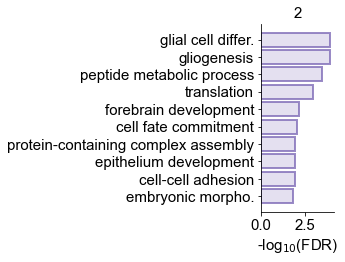

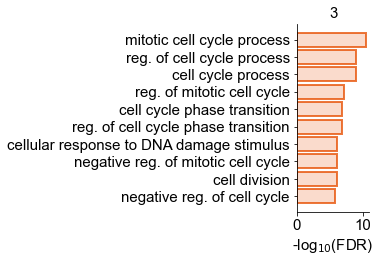

In [34]:
for n in np.unique(list(part.values())):
    go_plot(n)
#     plt.savefig(f'./../../figs/8E_{n}.svg', pad_inches=0.1, bbox_inches='tight')

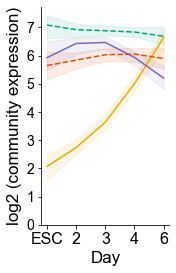

In [33]:
dfmem = pd.DataFrame(part, index=['Community']).T
fig = plt.figure(figsize=((2.3,4)))
ax = fig.add_subplot(1,1,1)
cmap = get_cmap(part, highlight=True, modulelist=list(np.arange(4)), alpha=0.8)
eval_x = np.arange(1.0,6.0)

for n in list(np.arange(4)):
    xs = np.repeat(np.array([np.repeat(np.arange(1.0,6.0),2)]),len(dfmem[dfmem['Community']==n]),axis=0)
    ys = dfexp.loc[dfmem[dfmem['Community']==n].index].to_numpy()[:,30:]
    smoothed, bottom, top = lowess_with_confidence_bounds(
        xs.flatten(), ys.flatten(), eval_x, lowess_kw={"frac": 0.8, "return_sorted":False})
    if n in [1,2]:
        plt.plot(eval_x,smoothed, color=cmap[n])
    else:
        plt.plot(eval_x,smoothed, color=cmap[n], ls='--')
    plt.fill_between(eval_x, bottom, top, color=cmap[n], alpha=0.1)

plt.ylim(bottom=0)
plt.xlabel('Day', fontsize=17)
plt.ylabel('log2 (community expression)', fontsize=17)
plt.xticks([1,2,3,4,5], ['ESC','2','3','4','6'], fontsize=16)
plt.yticks(fontsize=14)
# plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('./../../figs/8E_exp.svg', pad_inches=0.1, bbox_inches='tight')

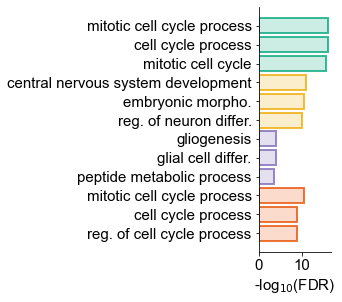

In [66]:
go_group_plot(list(np.arange(4)))
# plt.savefig('./../../figs/8E_exp_go.svg', pad_inches=0.1, bbox_inches='tight')

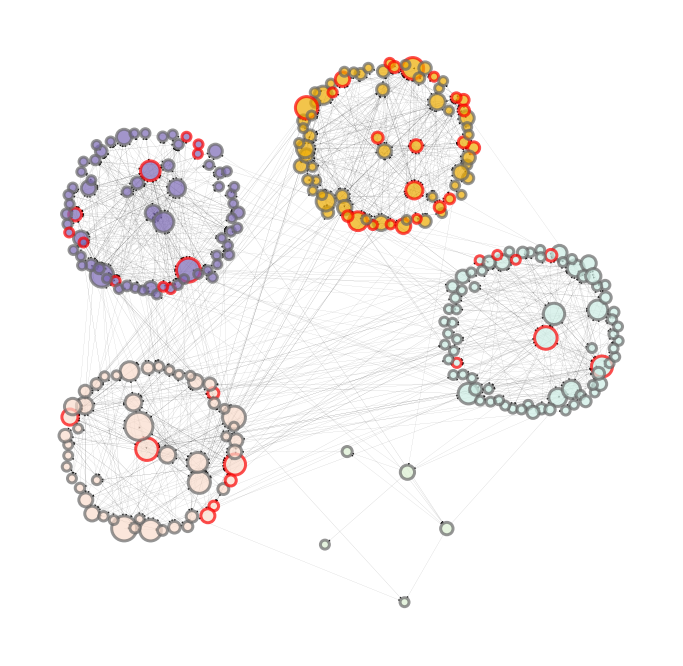

In [38]:
part = louvain_cluster(DGp, random_state=True, random_s=random_s)
pos = community_layout(DGp, partition=part, scales_c=2.4, scales_n=1.8)
fig, ax = plt.subplots(figsize=(12, 12))
edge_colors = highlight_cmap(list(DGp.nodes()),grntfs)

node_size = np.array(list(nx.betweenness_centrality(DGp, weight='weight', seed=random_s).values()))*8000+80
edge_width = np.array(list(nx.get_edge_attributes(DGp, 'weight').values()))
#cmap = get_cmap(part, highlight=False)
cmap = get_cmap(part, highlight=True, modulelist=[1,2], alpha=0.8)
node_color=[cmap[v] for v in list(part.values())]

nodes = nx.draw_networkx_nodes(DGp, pos, node_color=node_color, edgecolors=edge_colors,
                               node_size=node_size, alpha=0.7, linewidths=3)
edges = nx.draw_networkx_edges(DGp, pos, node_size=node_size,
                               width=0.1*edge_width, edge_color='black', arrowsize=5)

ax.set_axis_off()
# plt.savefig('./../../figs/8E.svg', pad_inches=0.1, bbox_inches='tight')

In [36]:
dffig = pd.DataFrame(zip(list(DGp.nodes()), node_size, edge_colors, list(part.values())), 
columns=['geneid', 'rank', 'istf', 'community'])
dffig[dffig['istf']=='#fc0303'].sort_values(by=['rank'], ascending=False)[:10]

,geneid,rank,istf,community
40,Otx2,573.906810,#fc0303,2
17,Pax6,509.493088,#fc0303,0
19,Irx3,505.704045,#fc0303,3
129,Pax3,497.306708,#fc0303,1
0,Pou3f4,470.885817,#fc0303,1
42,Dbx1,444.976959,#fc0303,3
12,Hes5,438.013313,#fc0303,0
7,Neurod4,385.785970,#fc0303,2
48,Nr2f1,352.299027,#fc0303,1
8,Npas3,294.541731,#fc0303,1


In [14]:
dffig[dffig['istf']!='#fc0303'].sort_values(by=['rank'], ascending=False)[:3]

,geneid,rank,istf,community
47,Fzd2,785.581157,#696969,3
51,Mcm7,625.007680,#696969,3
26,Prtg,545.745008,#696969,2
